## Generating facies realizations with GeostatsPy

We generate here a set of facies realizations (sand/ shale) using the fantastic geostatistical library _geostatspy_ (https://github.com/GeostatsGuy/GeostatsPy) by Michael Pyrcz (University of Texas, Austin).

The example is modified from his notebook https://github.com/GeostatsGuy/PythonNumericalDemos/GeostatsPy_sisim.ipynb

In [ ]:
import os                                                 # to set current working directory 
import numpy as np                                        # arrays and matrix math
import pandas as pd                                       # DataFrames
import matplotlib.pyplot as plt                           # plotting
import geostatspy.GSLIB as GSLIB
import geostatspy.geostats as geostats



### Load Data

We are using a data set that is also provided by Michael Pyrcz on https://github.com/GeostatsGuy/GeoDataSets

In [24]:
df = pd.read_csv("sample_data_MV_biased.csv")             # read a .csv file in as a DataFrame
df.describe()                                             # summary statistics 
df = df.sample(50)                                        # extract 50 samples
df = df.reset_index()                                     # reset the record index 
df.head(n=10)

,index,Unnamed: 0,X,Y,Facies,Porosity,Perm,AI
0,270,429,370.0,219.0,0.0,0.080088,0.453978,5950.050624
1,37,53,600.0,100.0,1.0,0.152042,54.035749,5216.867196
2,209,343,660.0,769.0,1.0,0.130744,7.318424,4286.269709
3,282,449,300.0,539.0,1.0,0.148719,86.109630,4454.324696
4,292,459,490.0,19.0,0.0,0.067607,0.648172,5297.559776
5,99,161,190.0,309.0,0.0,0.101047,1.815873,5402.085094
6,34,48,600.0,600.0,0.0,0.087710,1.826601,4815.685452
7,238,389,470.0,969.0,1.0,0.136712,37.116961,4649.395551
8,92,151,510.0,939.0,1.0,0.148882,70.562785,3665.012314
9,223,365,580.0,879.0,1.0,0.169654,159.155069,4760.335515


### Generating Realizations

In [18]:
# Sequential Indicator Simulation with Simple Kriging Multiple Realizations 
nx = 50; ny = 50; xsiz = 20.0; ysiz = 20.0; xmn = 10.0; ymn = 10.0; nxdis = 1; nydis = 1
ndmin = 0; ndmax = 10; nodmax = 10; radius = 400; skmean = 0
tmin = -999; tmax = 999
dummy_trend = np.zeros((11,11))            # the current version requires trend input - if wrong size it is ignored 

ncut = 2                                   # number of facies
thresh = [0,1]                             # the facies categories (use consisten order)
gcdf = [0.4,0.6]                           # the global proportions of the categories
varios = []                                # the variogram list
varios.append(GSLIB.make_variogram(nug=0.0,nst=1,it1=1,cc1=1.0,azi1=0,hmaj1=100,hmin1=100)) # shale indicator variogram
# varios.append(GSLIB.make_variogram(nug=0.0,nst=1,it1=1,cc1=1.0,azi1=0,hmaj1=100,hmin1=100)) # sand indicator variogram
varios.append(GSLIB.make_variogram(nug=0.0,nst=1,it1=1,cc1=1.0,azi1=0,hmaj1=100,hmin1=100)) # sand indicator variogram


n_realizations = 10
np.random.seed(seed = 12345)
seeds = np.random.choice(10000, n_realizations, replace=False)
seeds

array([7867, 1402, 8606, 8885, 6494, 9628, 7459, 3964, 7000, 4470])

In [19]:
realizations = np.empty(shape=(n_realizations, nx, ny))

for i in range(n_realizations):
    realizations[i,:,:] = geostats.sisim(df,'X','Y','Facies',ivtype=0,koption=0,ncut=2,thresh=thresh,gcdf=gcdf,trend=dummy_trend,
                   tmin=tmin,tmax=tmax,zmin=0.0,zmax=1.0,ltail=1,ltpar=1,middle=1,mpar=0,utail=1,utpar=2,
                   nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=seeds[i],
                   ndmin=ndmin,ndmax=ndmax,nodmax=nodmax,mults=1,nmult=3,noct=-1,radius=radius,ktype=0,vario=varios)

# sim_ik2 = geostats.sisim(df,'X','Y','Facies',ivtype=0,koption=0,ncut=2,thresh=thresh,gcdf=gcdf,trend=dummy_trend,
#                tmin=tmin,tmax=tmax,zmin=0.0,zmax=1.0,ltail=1,ltpar=1,middle=1,mpar=0,utail=1,utpar=2,
#                nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed = 73074,
#                ndmin=ndmin,ndmax=ndmax,nodmax=nodmax,mults=1,nmult=3,noct=-1,radius=radius,ktype=0,vario=varios)

# sim_ik3 = geostats.sisim(df,'X','Y','Facies',ivtype=0,koption=0,ncut=2,thresh=thresh,gcdf=gcdf,trend=dummy_trend,
#                tmin=tmin,tmax=tmax,zmin=0.0,zmax=1.0,ltail=1,ltpar=1,middle=1,mpar=0,utail=1,utpar=2,
#                nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed = 73075,
#                ndmin=ndmin,ndmax=ndmax,nodmax=nodmax,mults=1,nmult=3,noct=-1,radius=radius,ktype=0,vario=varios)

Data for IK3D: Variable column Facies
  Number   = 50
Setting up rotation matrices for variogram and search
Working on a single realization, seed 7867
   currently on node 0
   currently on node 250
   currently on node 500
   currently on node 750
   currently on node 1000
   currently on node 1250
   currently on node 1500
   currently on node 1750
   currently on node 2000
   currently on node 2250
Data for IK3D: Variable column Facies
  Number   = 50
Setting up rotation matrices for variogram and search
Working on a single realization, seed 1402
   currently on node 0
   currently on node 250
   currently on node 500
   currently on node 750
   currently on node 1000
   currently on node 1250
   currently on node 1500
   currently on node 1750
   currently on node 2000
   currently on node 2250
Data for IK3D: Variable column Facies
  Number   = 50
Setting up rotation matrices for variogram and search
Working on a single realization, seed 8606
   currently on node 0
   currently on 

### Plot realizations

Just to get an impression, here a plot of some realizations:

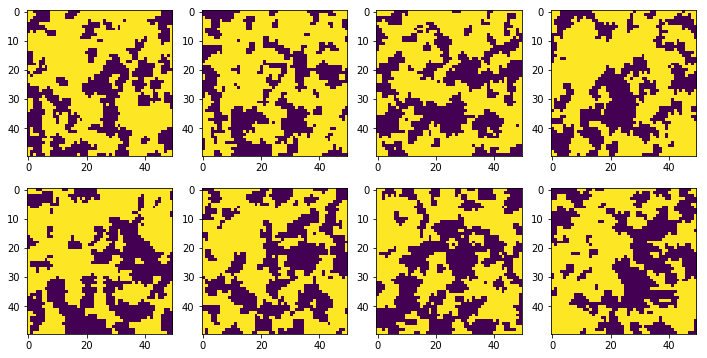

In [31]:
plt.figure(figsize=(12,6))
for i in range(1, 9):
    plt.subplot(2, 4, i)
    plt.imshow(realizations[i])

...and here simply the sum:

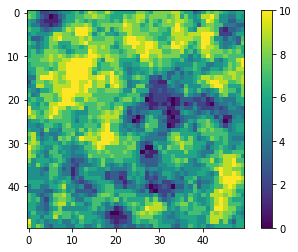

In [32]:
plt.imshow(np.sum(realizations, axis=0))
plt.colorbar()

...and the (estimated) probability for facies=1:

### Show conditioning points

It is also possible to show the conditioning points using proper GSLib functions - see github page of GeostatsPy (commented out here for now).

In [ ]:
# xmin = 0.0; xmax = 1000.0; ymin = 0.0; ymax = 1000.0; cmap = plt.cm.inferno # plotting parameters

# plt.subplot(131)                                          # plot the results
# GSLIB.locpix_st(sim_ik1,xmin,xmax,ymin,ymax,xsiz,-.4,1.0,df,'X','Y','Facies','Sequential Indicator Simulation - Realization 1','X(m)','Y(m)','Facies',cmap)

# plt.subplot(132)                                          # plot the results
# GSLIB.locpix_st(sim_ik1,xmin,xmax,ymin,ymax,xsiz,-.4,1.0,df,'X','Y','Facies','Sequential Indicator Simulation - Realization 2','X(m)','Y(m)','Facies',cmap)

# plt.subplot(133)                                          # plot the results
# GSLIB.locpix_st(sim_ik1,xmin,xmax,ymin,ymax,xsiz,-.4,1.0,df,'X','Y','Facies','Sequential Indicator Simulation - Realization 3','X(m)','Y(m)','Facies',cmap)

# plt.subplots_adjust(left=0.0, bottom=0.0, right=4.0, top=1.5, wspace=0.2, hspace=0.2)
# plt.show()